# 1. read data from SQL Database !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"R:\\Data Science\\ZDS\\Projects\\Predict Password Strength\\password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


# 2. Doing basic data cleaning !

In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(["index"] ,axis=1 , inplace=True)

In [9]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


### Check duplicate rows

In [10]:
data.duplicated().sum()

0

### Checking missing values in columns

In [11]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [12]:
data.isnull().any().sum()

0

### Check dat_types of every feature

In [13]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has ir-relevant values or not 

In [14]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [15]:
# uniuqe() it is used for ir-relavante function
data["strength"].unique()

array([1, 2, 0], dtype=int64)

# 3. Performing Semantic Analysis 

In [16]:
data.columns

Index(['password', 'strength'], dtype='object')

In [17]:
type(data["password"][0])

str

### A. How many password textual actually holds only numeric characters

In [18]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [19]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [20]:
data[data["password"].str.isnumeric()].shape

(26, 2)

### B. How many password textual actually holds only Upper-case character

In [21]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### C. How many password textual actually holds only alphabet

In [22]:
data[data["password"].str.isupper()].shape

(1506, 2)

In [23]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [24]:
data[data["password"].str.isalpha()].shape

(50, 2)

### D. How many password textual actually holds alpha-numeric character 

In [25]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [26]:
data[data["password"].str.isalnum()].shape

(97203, 2)

### E. How many password textual actually holds title-case character

In [27]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [28]:
data[data["password"].str.istitle()].shape

(932, 2)

### F. How many password textual actually holds special character

In [29]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [30]:
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [33]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [34]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [35]:
data[data["password"].apply(find_semantics)==1].shape

(2663, 2)

# 4. Applying Feature Engineering

### length of every Password

In [36]:
data["password"][0]

'zxe870819'

In [37]:
len(data["password"][0])

9

In [38]:
data["password"].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [39]:
data["length"] = data["password"].str.len()

### Frequency of Lowercase Characters

In [40]:
password = "Shan99"

In [41]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [42]:
len([char for char in password if char.islower()])

3

In [43]:
len([char for char in password if char.islower()])/len(password)

0.5

### Frequency of lowercase Characters 

In [44]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

### Frequency of Uppercase Characters

In [45]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

### Frequency of Numeric Characters 

In [46]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [47]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [48]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


### Frequency of Special-case Characters

In [49]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [50]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [51]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [52]:
data["special_char_freq"]/data["length"]

0        0.000000
1        0.000000
2        0.000000
3        0.043478
4        0.000000
           ...   
99995    0.000000
99996    0.000000
99997    0.000000
99998    0.000000
99999    0.000000
Length: 100000, dtype: float64

In [53]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [54]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# 5. Performing Descriptive Statistics

In [55]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [56]:
data[['length' , 'strength']]

,length,strength
0,9,1
1,12,1
2,9,1
3,23,2
4,8,1
...,...,...
99995,10,1
99996,10,1
99997,9,1
99998,9,1


In [57]:
data[['length' , 'strength']].groupby(['strength']).agg(["min" , "max", "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [58]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min" , "max", "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [59]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

<Axes: xlabel='strength', ylabel='special_char_freq'>

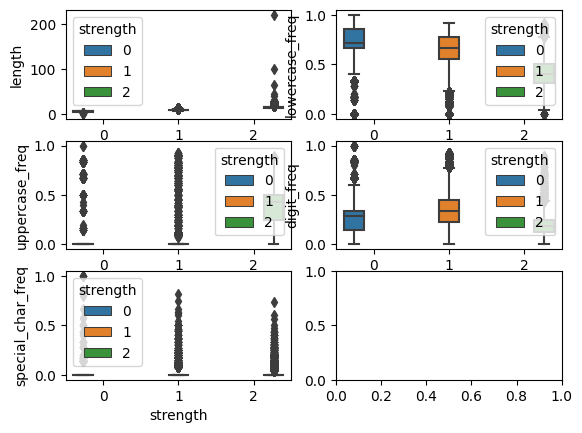

In [60]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5 , ax6)) = plt.subplots(3 , 2)

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2 , data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3 , data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4 , data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5 , data=data)

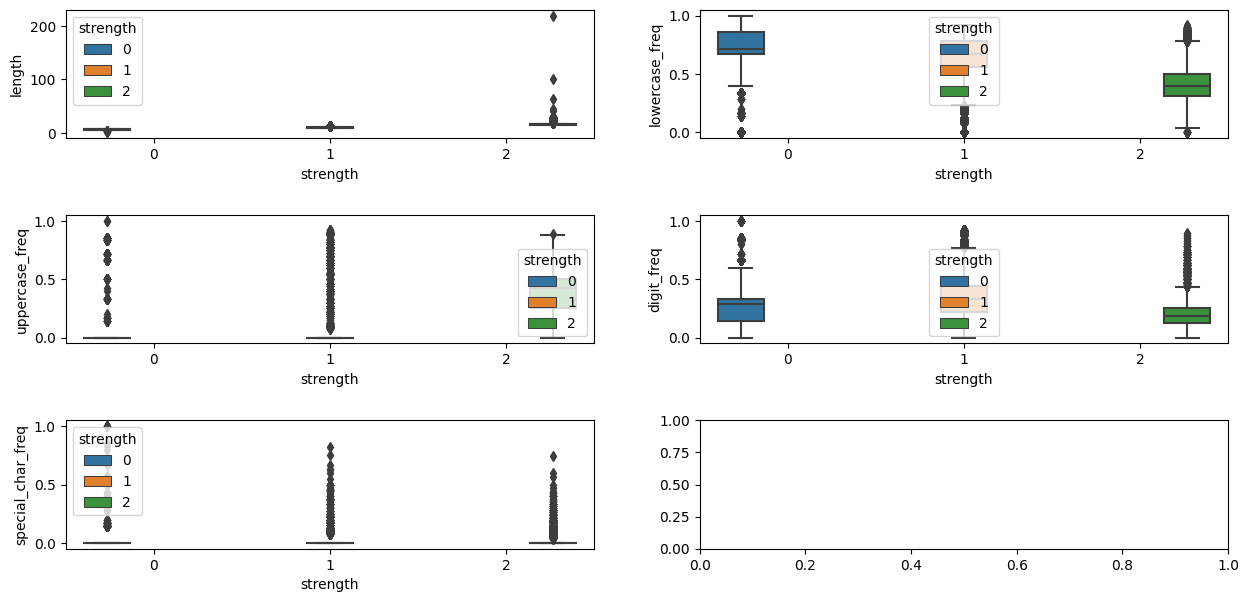

In [61]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5 , ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2 , data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3 , data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4 , data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5 , data=data)

plt.subplots_adjust(hspace=0.6)

# 6.. Feature Importance  ( How to figure out imp. feature )

In [62]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [63]:
  def get_dist(data , feature):
        
        plt.figure(figsize=(10,8))
        plt.subplot(1,2,1)
        
        sns.violinplot(x='strength' , y=feature , data=data)
        
        plt.subplot(1,2,2)
        
        sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
        sns.distplot(data[data['strength']==1][feature] , color="blue" , label="1" , hist=False)
        sns.distplot(data[data['strength']==2][feature] , color="orange" , label="2" , hist=False)
        plt.legend()
        plt.show()

In [64]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

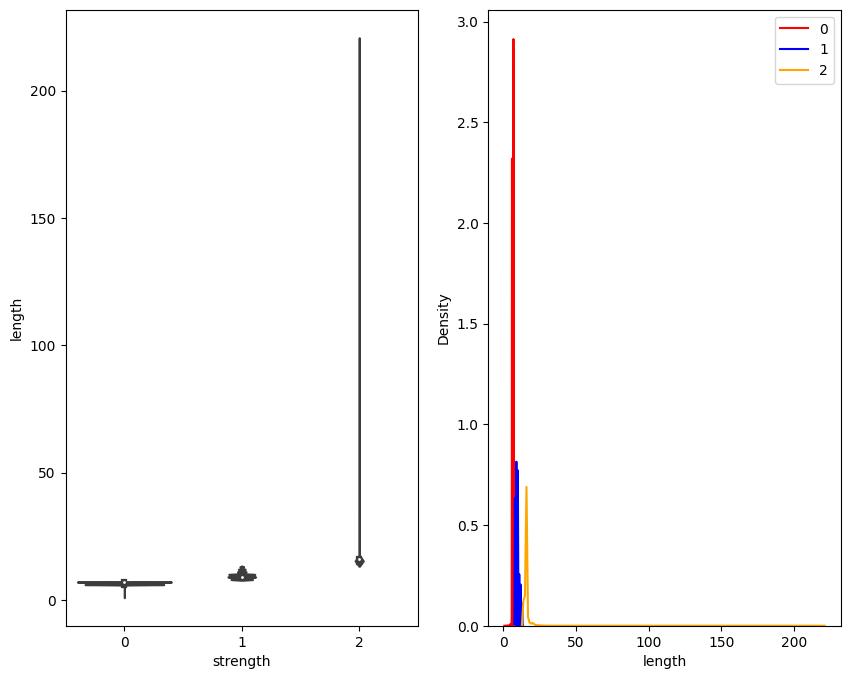

In [65]:
get_dist(data , "length" )

In [66]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

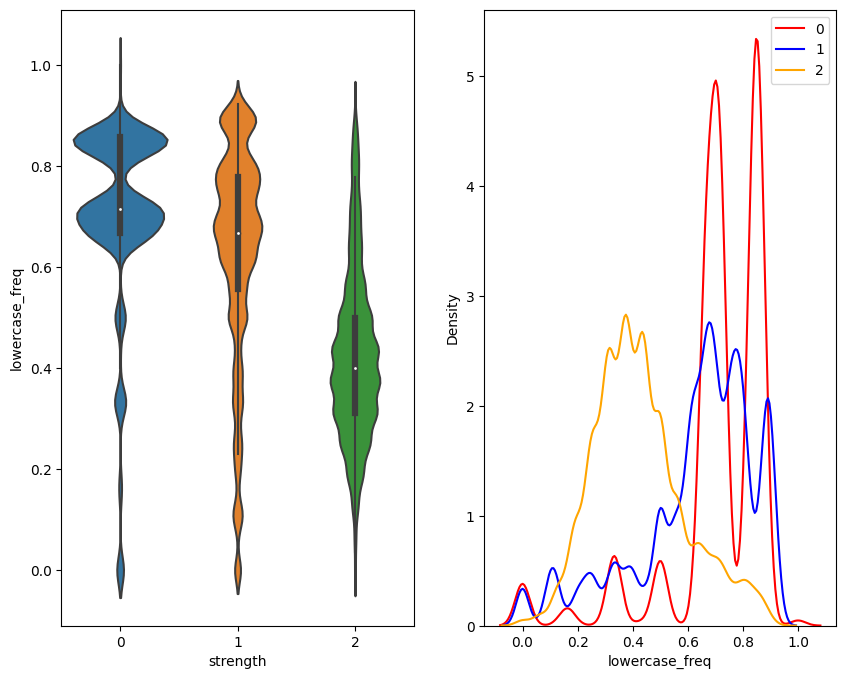

In [67]:
get_dist(data , 'lowercase_freq')

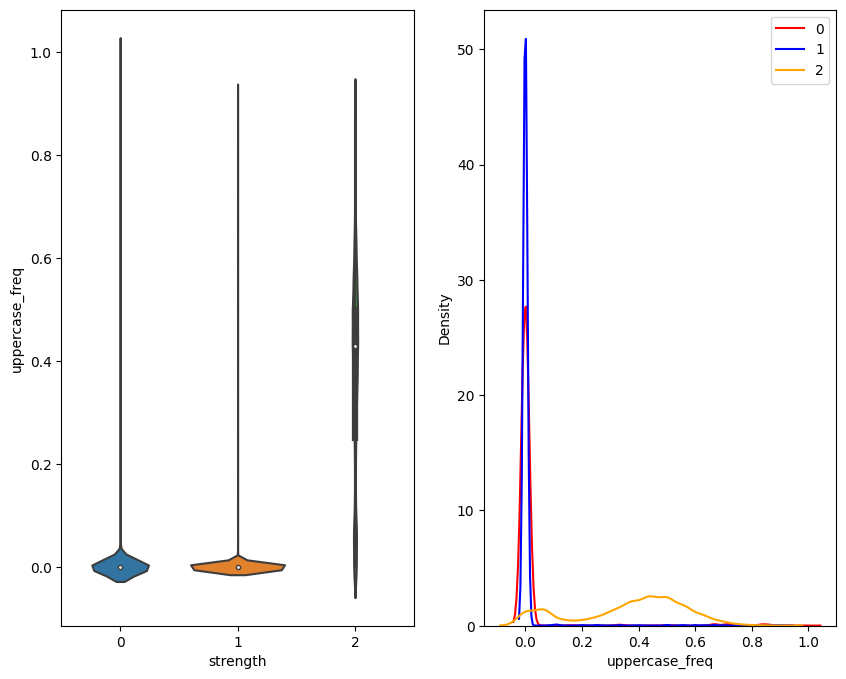

In [68]:
get_dist(data , 'uppercase_freq')

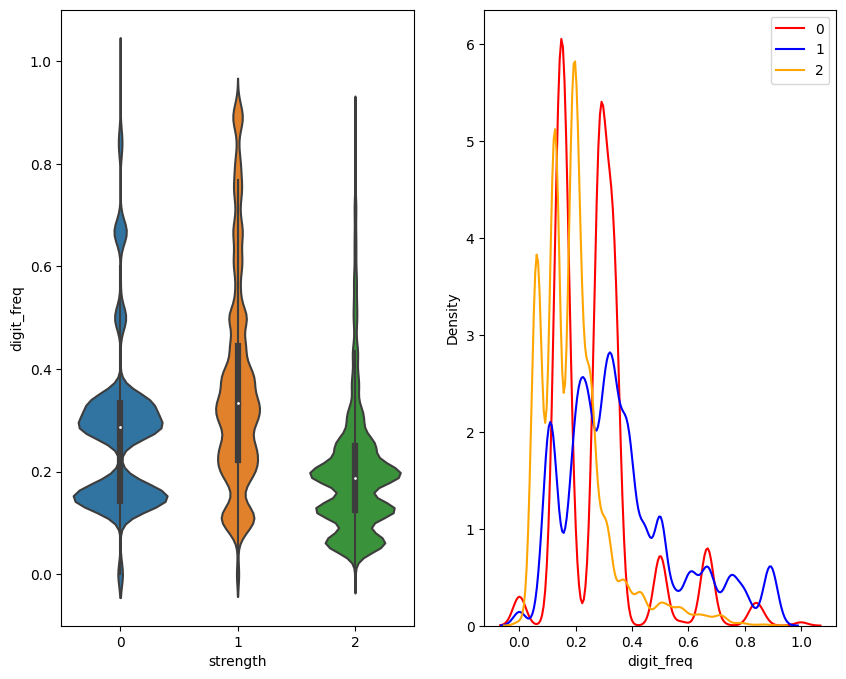

In [69]:
get_dist(data , 'digit_freq')

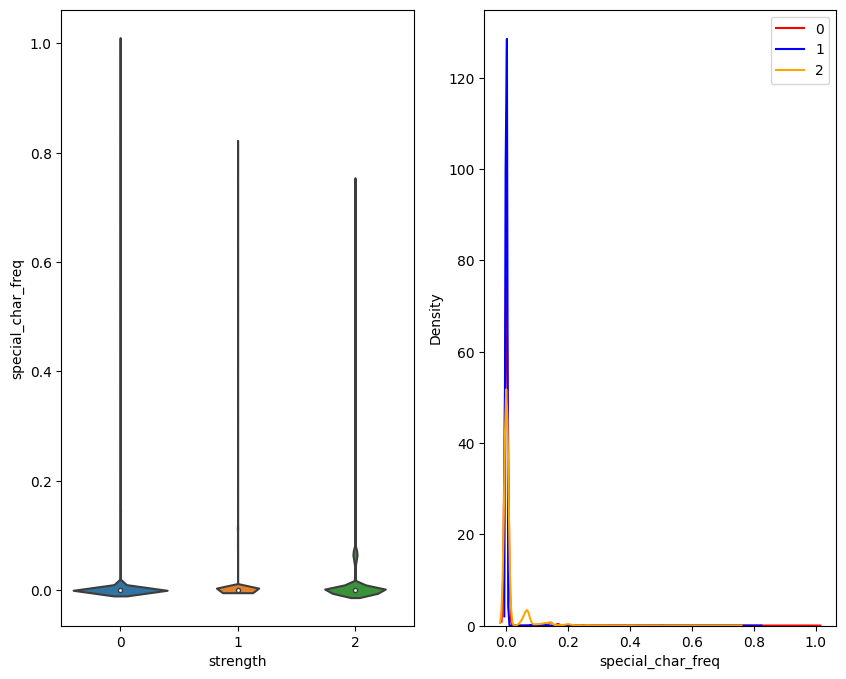

In [70]:
get_dist(data , 'special_char_freq')

# 7.. Applying TF_IDF on data

In [71]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [72]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [73]:
dataframe = data.sample(frac=1)

In [74]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
48640,master91,1,8,0.750,0.000,0.250,0.0
73165,pelmos13,1,8,0.750,0.000,0.250,0.0
43781,assedu63,1,8,0.750,0.000,0.250,0.0
2868,EYE031213,1,9,0.000,0.333,0.667,0.0
46936,NZDmkBTAwMAbI25A,2,16,0.250,0.625,0.125,0.0
...,...,...,...,...,...,...,...
88905,y79oui63ry,1,10,0.600,0.000,0.400,0.0
97307,36217366j,1,9,0.111,0.000,0.889,0.0
57151,volkswagon1,1,11,0.909,0.000,0.091,0.0
1438,glenndm45,1,9,0.778,0.000,0.222,0.0


In [75]:
x = list(dataframe["password"])

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
vectorizer = TfidfVectorizer(analyzer="char")

In [78]:
X = vectorizer.fit_transform(x)

In [79]:
X.shape

(100000, 99)

In [80]:
dataframe["password"].shape

(100000,)

In [81]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [82]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.28678758, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.40097108,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27618673, 0.        , 0.        ,
       0.        , 0.32354062, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38168906,
       0.        , 0.        , 0.        , 0.        , 0.36789916,
       0.37628199, 0.39165414, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
dataframe["password"]

48640            master91
73165            pelmos13
43781            assedu63
2868            EYE031213
46936    NZDmkBTAwMAbI25A
               ...       
88905          y79oui63ry
97307           36217366j
57151         volkswagon1
1438            glenndm45
16766    vKixN2zk3NwirgEd
Name: password, Length: 100000, dtype: object

In [85]:
len(vectorizer.get_feature_names_out())

99

In [86]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [87]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [88]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8. Applying Machine Learning algorithm

In [89]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [90]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [91]:
y = dataframe["strength"]

### split data into train & test

In [92]:
 from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [94]:
X_train.shape

(80000, 101)

In [95]:
y_train.shape

(80000,)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf = LogisticRegression(multi_class="multinomial")

In [98]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [99]:
y_pred = clf.predict(X_test)

In [100]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [101]:
from collections import Counter

In [102]:
Counter(y_pred)

Counter({1: 16584, 2: 1898, 0: 1518})

# 9. Doing prediction on sample data (user-entered input)

In [103]:
password = "%@123abcd"

In [104]:
sample_array = np.array([password])

In [105]:
sample_matrix = vectorizer.transform(sample_array)

In [106]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [107]:
sample_matrix.toarray().shape

(1, 99)

In [108]:
password

'%@123abcd'

In [109]:
len(password)

9

In [110]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [111]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [112]:
np.append(sample_matrix.toarray() ,(9,0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [113]:
np.append(sample_matrix.toarray() ,(9,0.444)).shape

(101,)

In [114]:
np.append(sample_matrix.toarray() ,(9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [115]:
np.append(sample_matrix.toarray() ,(9,0.444)).reshape(1,101).shape

(1, 101)

In [116]:
new_matrix = np.append(sample_matrix.toarray() ,(9,0.444)).reshape(1,101)

In [117]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [118]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [119]:
predict()

Enter a password : bcelmc


'Password is weak'

In [120]:
predict()

Enter a password : bcelmc@$


'Password is weak'

# 10.. Model evaluation 

In [121]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [122]:
accuracy_score(y_test , y_pred)

0.80115

In [123]:
confusion_matrix(y_test , y_pred)

array([[  802,  1930,     7],
       [  638, 13715,   385],
       [   78,   939,  1506]], dtype=int64)

In [124]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.38      2739
           1       0.83      0.93      0.88     14738
           2       0.79      0.60      0.68      2523

    accuracy                           0.80     20000
   macro avg       0.72      0.61      0.64     20000
weighted avg       0.78      0.80      0.78     20000

